In [70]:
from datetime import datetime
import requests

import pandas as pd
import matplotlib.pyplot as plt

First define some helper functions:

In [71]:
def str_to_datetime(val, mode):
    if mode == 'btc':
        date_obj = datetime.strptime(val, '%b-%d-%Y')
    elif mode == 'pph':
        date_obj = datetime.strptime(val, '%m/%d/%y')
    elif mode == 'graph':
        date_obj = datetime.strptime(val, '%Y-%m-%d')
    return date_obj

def datetime_to_str(val):
    string = datetime.strftime(val, '%Y-%m-%d')
    return string

Next create from csv and format a dataframe containing historical BTC price:

In [72]:
btc_df = pd.read_csv('bitcoin.csv')
btc_df['Date'] = btc_df['Date'].apply(str_to_datetime, args=('btc', ))
btc_df['Date'] = btc_df['Date'].apply(datetime_to_str)
btc_df.index = btc_df['Date']
btc_df.drop(['Date', 'High', 'Low', 'Close', 'Volume', 'Market Cap'], axis=1, inplace=True)
btc_df

,Open
Date,
2022-11-28,16425.212911
2022-11-27,16457.253279
2022-11-26,16513.928700
2022-11-25,16609.375900
2022-11-24,16624.779500
...,...
2017-12-03,11048.835144
2017-12-02,10957.085129
2017-12-01,10215.701154


Create from csv a dataframe of historical prices per hash, and use the BTC price to derive USD price per hash:

In [73]:
pph_df = pd.read_csv('pph.csv')

def get_price(val):
    price = btc_df.loc[val]['Open']
    return price

pph_df['date'] = pph_df['date'].apply(str_to_datetime, args=('pph', ))
pph_df['date'] = pph_df['date'].apply(datetime_to_str)
pph_df['btc_price'] = pph_df['date'].apply(get_price)
pph_df['usd_per_exa'] = pph_df['pph']*pph_df['btc_price']
pph_df.sort_values(by='date', ascending=True, inplace=True)
pph_df

,date,pph,btc_price,usd_per_exa
30,2018-02-01,111.0000,10269.843887,1.139953e+06
29,2018-04-03,72.0000,7066.360265,5.087779e+05
28,2018-05-02,64.8000,9084.637928,5.886845e+05
27,2018-06-06,57.2000,7611.859044,4.353983e+05
26,2018-07-03,49.5000,6595.975191,3.265008e+05
25,2018-08-07,46.0000,6945.218332,3.194800e+05
24,2018-09-04,40.0000,7267.905332,2.907162e+05
23,2018-10-03,35.5000,6539.365527,2.321475e+05
22,2018-11-07,35.0000,6437.632241,2.253171e+05
21,2018-12-04,46.0000,3905.489739,1.796525e+05


Plot and save cost of hashpower in BTC per day:

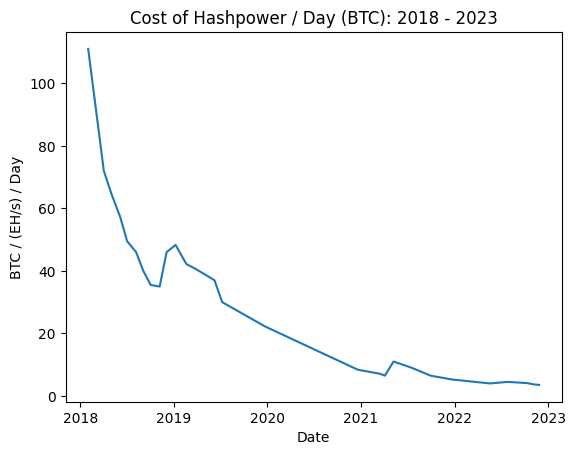

In [89]:
fig, ax = plt.subplots(1,1)
ax.plot(pph_df['date'].apply(str_to_datetime, args=('graph', )), pph_df['pph'])
plt.xlabel('Date')
plt.ylabel('BTC / (EH/s) / Day')
plt.title('Cost of Hashpower / Day (BTC): 2018 - 2023')

plt.savefig('btc_rent.png')
plt.show()

Plot and save cost of hashpower in USD per day:

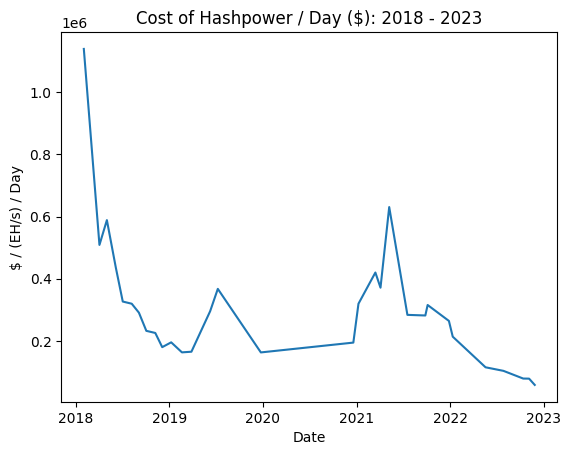

In [90]:
fig, ax = plt.subplots(1,1)
ax.plot(pph_df['date'].apply(str_to_datetime, args=('graph', )), pph_df['usd_per_exa'])
plt.xlabel('Date')
plt.ylabel('$ / (EH/s) / Day')
plt.title('Cost of Hashpower / Day ($): 2018 - 2023')

plt.savefig('usd_rent.png')
plt.show()

Get historical hashrate data from NASDAQ API (as in the `hash` section of the repository):

In [78]:
hr_response = requests.get('https://data.nasdaq.com/api/v3/datasets/BCHAIN/HRATE.json?api_key=CEZ47Us4M6dvsFYzReoG')
hr_data = hr_response.json()['dataset']['data']
hr_df = pd.DataFrame.from_records(hr_data, columns=['Date', 'Hashrate'])
hr_df['Day'] = list(reversed(range(0, len(hr_df.index))))
hr_df.sort_values(by='Day', ascending=True, inplace=True)
hr_df.reset_index(drop=True, inplace=True)
hr_df = hr_df[['Date', 'Day', 'Hashrate']]
hr_df['Date'] = pd.to_datetime(hr_df['Date'])
hr_df['Hashrate (Raw)'] = hr_df['Hashrate']*1000000000000
hr_df['Hashrate (Exa)'] = hr_df['Hashrate (Raw)'] / 1e18

def timestamp_to_str(val):
    string = val.strftime('%Y-%m-%d')
    return string

hr_df['Date'] = hr_df['Date'].apply(timestamp_to_str)
hr_df.index = hr_df['Date']
hr_df.drop(['Date', 'Day', 'Hashrate', 'Hashrate (Raw)'], inplace=True, axis=1)
hr_df

,Hashrate (Exa)
Date,
2009-01-03,0.000000
2009-01-04,0.000000
2009-01-05,0.000000
2009-01-06,0.000000
2009-01-07,0.000000
...,...
2022-11-23,258.991482
2022-11-24,236.949654
2022-11-25,225.928740


Use historical hashrate to create more derived columns in price per hash data:

In [82]:
def get_hashrate(val):
    price = hr_df.loc[val]['Hashrate (Exa)']
    return price

pph_df['hashrate'] = pph_df['date'].apply(get_hashrate)
pph_df['exa_majority'] = 0.5*pph_df['hashrate']
pph_df['usd_majority'] = pph_df['usd_per_exa']*pph_df['exa_majority']
pph_df

,date,pph,btc_price,usd_per_exa,hashrate,exa_1_per,exa_majority,usd_majority
30,2018-02-01,111.0000,10269.843887,1.139953e+06,20.703948,0.207039,10.351974,1.180076e+07
29,2018-04-03,72.0000,7066.360265,5.087779e+05,28.449330,0.284493,14.224665,7.237196e+06
28,2018-05-02,64.8000,9084.637928,5.886845e+05,27.991271,0.279913,13.995635,8.239014e+06
27,2018-06-06,57.2000,7611.859044,4.353983e+05,36.103754,0.361038,18.051877,7.859757e+06
26,2018-07-03,49.5000,6595.975191,3.265008e+05,30.929069,0.309291,15.464534,5.049182e+06
25,2018-08-07,46.0000,6945.218332,3.194800e+05,44.657969,0.446580,22.328984,7.133665e+06
24,2018-09-04,40.0000,7267.905332,2.907162e+05,42.135936,0.421359,21.067968,6.124800e+06
23,2018-10-03,35.5000,6539.365527,2.321475e+05,51.556103,0.515561,25.778052,5.984310e+06
22,2018-11-07,35.0000,6437.632241,2.253171e+05,46.428032,0.464280,23.214016,5.230515e+06
21,2018-12-04,46.0000,3905.489739,1.796525e+05,38.734428,0.387344,19.367214,3.479369e+06


Create and save plot of cost per day of renting majority of BTC hashrate:

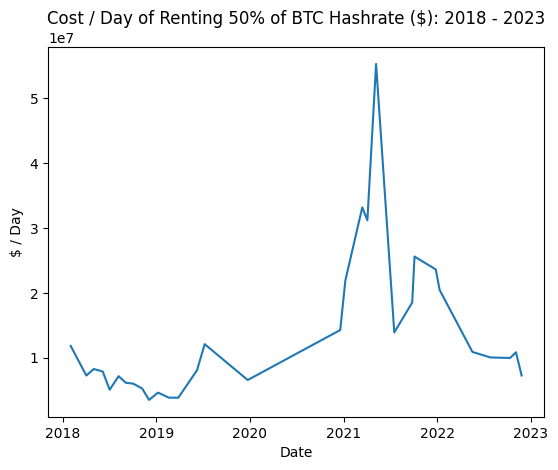

In [92]:
fig, ax = plt.subplots(1,1)
ax.plot(pph_df['date'].apply(str_to_datetime, args=('graph', )), pph_df['usd_majority'])
plt.xlabel('Date')
plt.ylabel('$ / Day')
plt.title('Cost / Day of Renting 50% of BTC Hashrate ($): 2018 - 2023')

plt.savefig('maj_rent.png')
plt.show()